############################################################################################################
#                                  Author: Flora Medeiros Sauerbronn                                       #
#                                           Date: 20/02/2024                                               #
#      This routine is the first oficial test of the Convolutional Neural Network using ResNet-18          #
#                          Tooked the base routine form chat GPT #faith                                    #
############################################################################################################

In [7]:
import torch
from torchvision import transforms, datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

###############################################################################################################
#IMAGE PRE PROCESSING
###############################################################################################################

# Caminhos para os dados
train_data_path = r'D:\SMALL_IMAGES_CNN\train'
val_data_path = r'D:\SMALL_IMAGES_CNN\val'
test_data_path = r'D:\SMALL_IMAGES_CNN\test'

# Transformações de dados
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Carregar os dados de treinamento, validação e teste
Note: 
ImageFolder atribui automaticamente rótulos a partir dos nomes das subpastas dentro da pasta principal.


In [8]:

train_dataset = datasets.ImageFolder(root=train_data_path, transform=data_transform)
val_dataset = datasets.ImageFolder(root=val_data_path, transform=data_transform)
test_dataset = datasets.ImageFolder(root=test_data_path, transform=data_transform)

In [9]:
# Carregar os dados utilizando DataLoader
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [10]:
import torchvision.models as models
import torch.nn as nn

# Carregar a ResNet-18 pré-treinada
resnet18 = models.resnet18(pretrained=True)

# Congelar os parâmetros da ResNet-18 para que não sejam treinados novamente
for param in resnet18.parameters():
    param.requires_grad = False

# Substituir a camada de classificação final para corresponder ao número de classes (2 para binário)
resnet18.fc = nn.Linear(resnet18.fc.in_features, 2)

C:\Users\flora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\flora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# Configurar otimizador e função de perda
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)

TRAINING THE MODEL

In [13]:
# Função de treinamento com monitoramento de métricas
def train_model_with_metrics(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        # Salvar a média da perda e precisão de treinamento
        train_losses.append(epoch_train_loss/len(train_loader))
        train_accuracies.append(100*correct_train/total_train)

        # Avaliação no conjunto de validação após cada época
        model.eval()
        with torch.no_grad():
            epoch_val_loss = 0.0
            correct_val = 0
            total_val = 0

            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item()

                _, predicted = outputs.max(1)
                total_val += labels.size(0)
                correct_val += predicted.eq(labels).sum().item()

            # Salvar a média da perda e precisão de validação
            val_losses.append(epoch_val_loss/len(val_loader))
            val_accuracies.append(100*correct_val/total_val)

            # Imprimir métricas
            print(f'Epoch {epoch+1}/{num_epochs} -> '
                  f'Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accuracies[-1]:.2f}% | '
                  f'Val Loss: {val_losses[-1]:.4f} | Val Accuracy: {val_accuracies[-1]:.2f}%')

    # Plotar gráficos
    plt.figure(figsize=(12, 4))

    # Gráfico de Precisão
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    # Gráfico de Perda
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

Epoch 1/10 -> Train Loss: 0.6876 | Train Accuracy: 54.76% | Val Loss: 0.7214 | Val Accuracy: 45.00%
Epoch 2/10 -> Train Loss: 0.5174 | Train Accuracy: 73.81% | Val Loss: 0.7022 | Val Accuracy: 46.67%
Epoch 3/10 -> Train Loss: 0.3867 | Train Accuracy: 87.14% | Val Loss: 0.6716 | Val Accuracy: 58.33%
Epoch 4/10 -> Train Loss: 0.3567 | Train Accuracy: 87.62% | Val Loss: 0.7361 | Val Accuracy: 56.67%
Epoch 5/10 -> Train Loss: 0.3119 | Train Accuracy: 90.48% | Val Loss: 0.9775 | Val Accuracy: 50.00%
Epoch 6/10 -> Train Loss: 0.2840 | Train Accuracy: 91.43% | Val Loss: 0.9760 | Val Accuracy: 50.00%
Epoch 7/10 -> Train Loss: 0.2236 | Train Accuracy: 91.90% | Val Loss: 0.8414 | Val Accuracy: 53.33%
Epoch 8/10 -> Train Loss: 0.2101 | Train Accuracy: 90.00% | Val Loss: 0.9746 | Val Accuracy: 51.67%
Epoch 9/10 -> Train Loss: 0.1890 | Train Accuracy: 92.86% | Val Loss: 1.2355 | Val Accuracy: 48.33%
Epoch 10/10 -> Train Loss: 0.2255 | Train Accuracy: 93.33% | Val Loss: 1.4518 | Val Accuracy: 50.00%

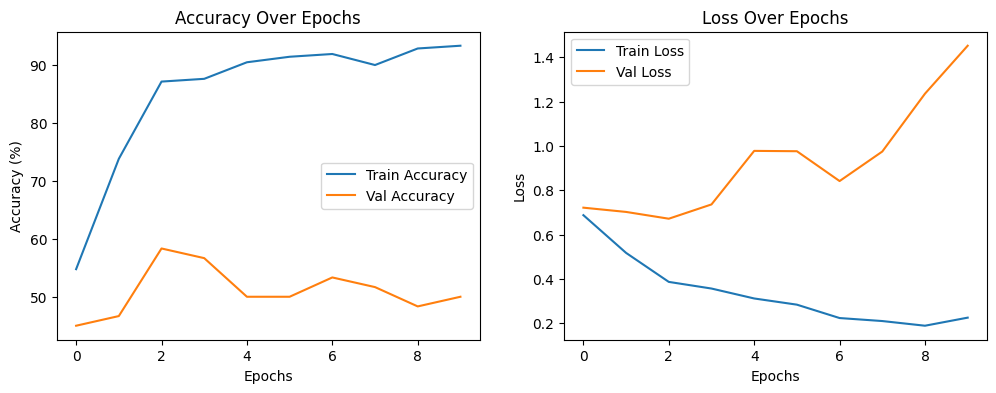

In [14]:
# Treinamento do modelo com monitoramento de métricas
train_model_with_metrics(resnet18, train_loader, val_loader, criterion, optimizer, num_epochs=30)
u


In [15]:
# Função de avaliação
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        # Imprimir métricas
        print(f'Test Accuracy: {100*correct/total}%')

# Avaliação do modelo no conjunto de teste
test_model(resnet18, test_loader)

Test Accuracy: 53.333333333333336%


In [19]:
def test_model_with_visualization(model, test_loader, mean, std, device):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        wrong_predictions = []

        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Armazenar informações sobre previsões incorretas
            wrong_predictions.extend((predicted != labels).nonzero().squeeze().tolist())

        # Imprimir métricas
        print(f'Test Accuracy: {100*correct/total}%')

        # Exibir imagens das previsões incorretas
        for idx in wrong_predictions:
            image, true_label = test_dataset[idx]
            predicted_label = predicted[idx].item()

            # Desnormalizar a imagem antes de exibir (se a normalização foi aplicada)
            image = image.numpy().transpose((1, 2, 0))  # (C x W x H) para (W x H x C)
            image = std * image + mean  # Desnormalizar

            plt.imshow(image)
            plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
            plt.show()

# Defina as médias e desvios padrão utilizados na normalização
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Defina o dispositivo (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## VISUALIZING IMAGES THAT WERE POORLY PREDICTED

Test Accuracy: 53.333333333333336%


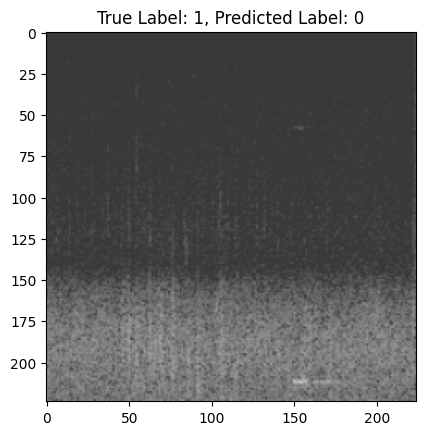

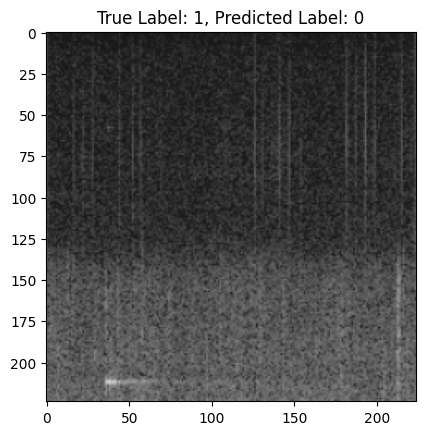

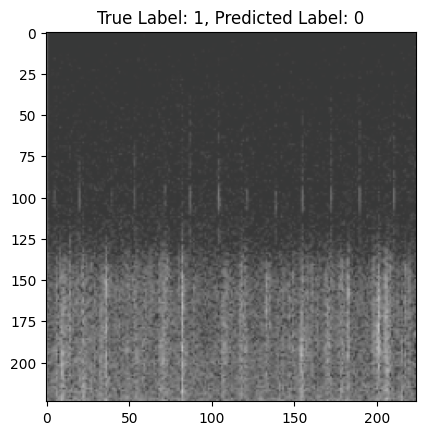

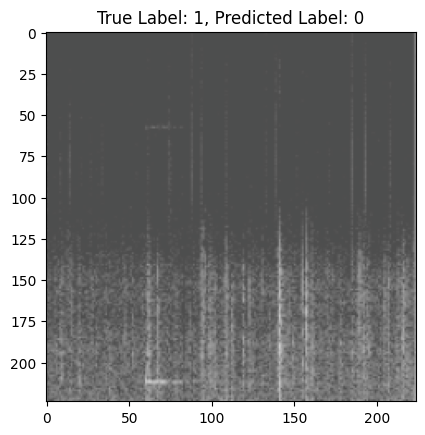

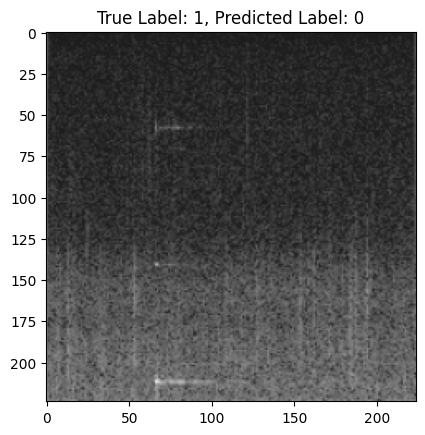

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


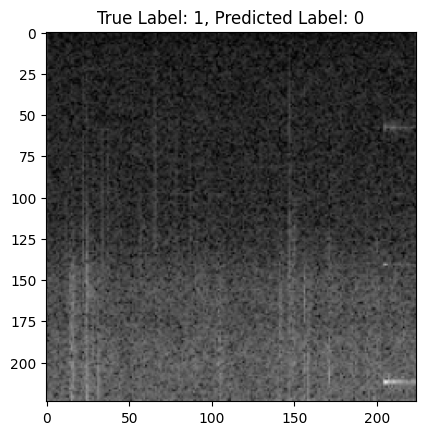

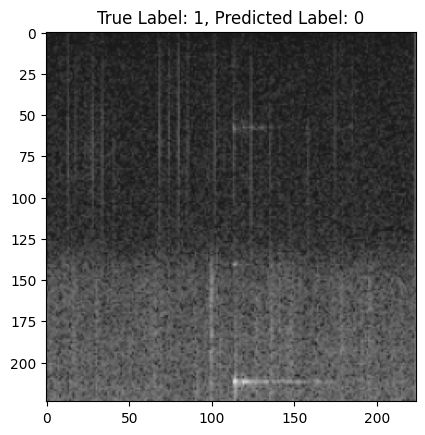

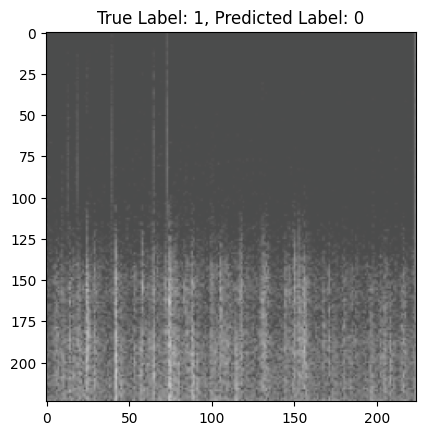

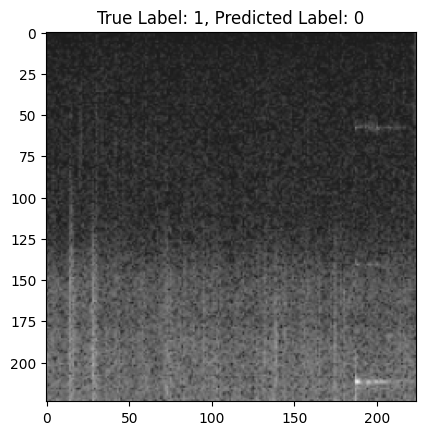

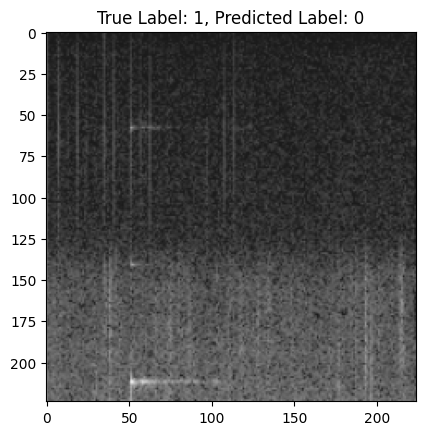

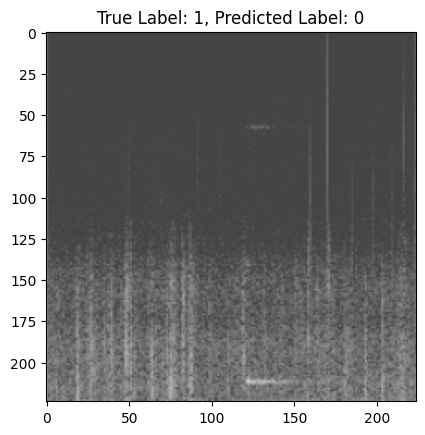

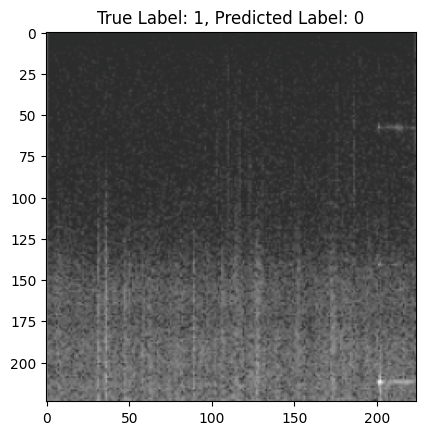

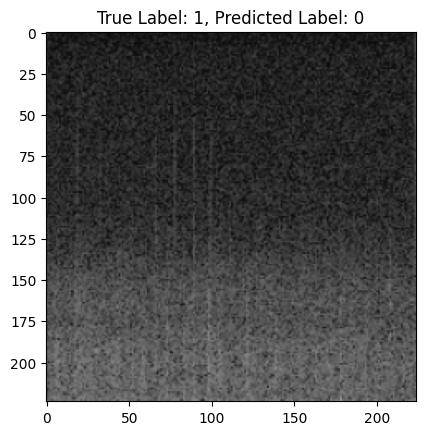

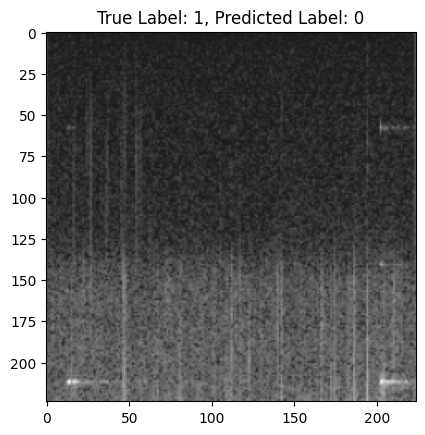

In [20]:
# Substitua "seu_modelo_treinado" pelo modelo que você treinou
test_model_with_visualization(resnet18, test_loader, mean, std, device)
